# Chapitre 4: La regression en finance

## 4.1 Intuition


In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datasets = pds.read_excel("dataset.xlsx")
datasets.corr()

,AMZN,BRENT,CAC40,NQ100,DJI30,DAX30,GOLD,EURUSD
AMZN,1.000000,-0.421819,0.778211,0.960369,0.950870,0.743347,-0.302171,-0.470636
BRENT,-0.421819,1.000000,-0.599353,-0.554603,-0.492757,-0.664231,0.652618,0.899293
CAC40,0.778211,-0.599353,1.000000,0.900011,0.898059,0.981916,-0.653307,-0.560685
NQ100,0.960369,-0.554603,0.900011,1.000000,0.989948,0.881750,-0.470683,-0.557515
DJI30,0.950870,-0.492757,0.898059,0.989948,1.000000,0.878014,-0.449811,-0.488816
DAX30,0.743347,-0.664231,0.981916,0.881750,0.878014,1.000000,-0.651545,-0.609943
GOLD,-0.302171,0.652618,-0.653307,-0.470683,-0.449811,-0.651545,1.000000,0.521115
EURUSD,-0.470636,0.899293,-0.560685,-0.557515,-0.488816,-0.609943,0.521115,1.000000


In [14]:
# Variable explicative
X = datasets[["GOLD"]].values
X = X[0:len(X)-1,:]

# Variable epliquée
y = datasets[["EURUSD"]].values
y = y[1:len(y),:]

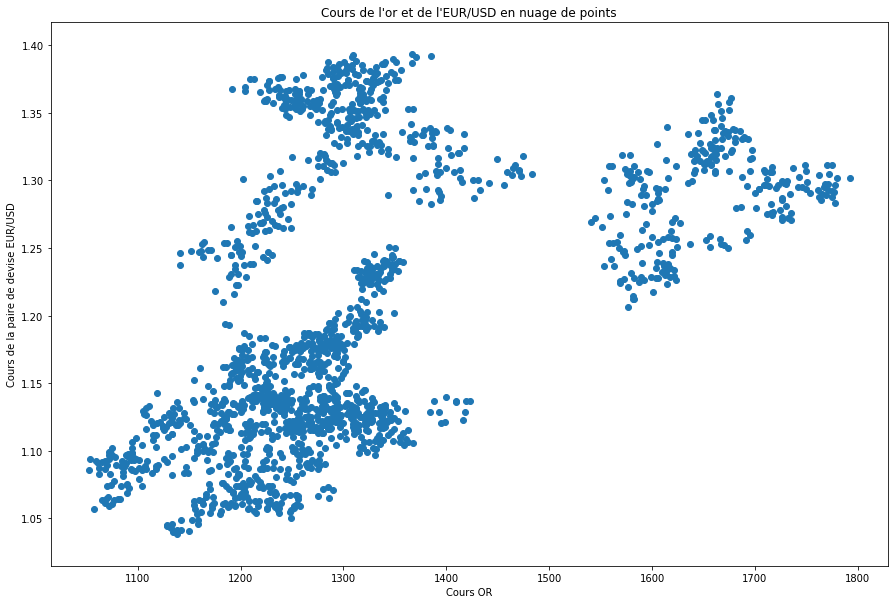

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(X,y)
plt.title("Cours de l'or et de l'EUR/USD en nuage de points")
plt.ylabel("Cours de la paire de devise EUR/USD")
plt.xlabel("Cours OR")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(X,y)
y_pred = lr.predict(X)

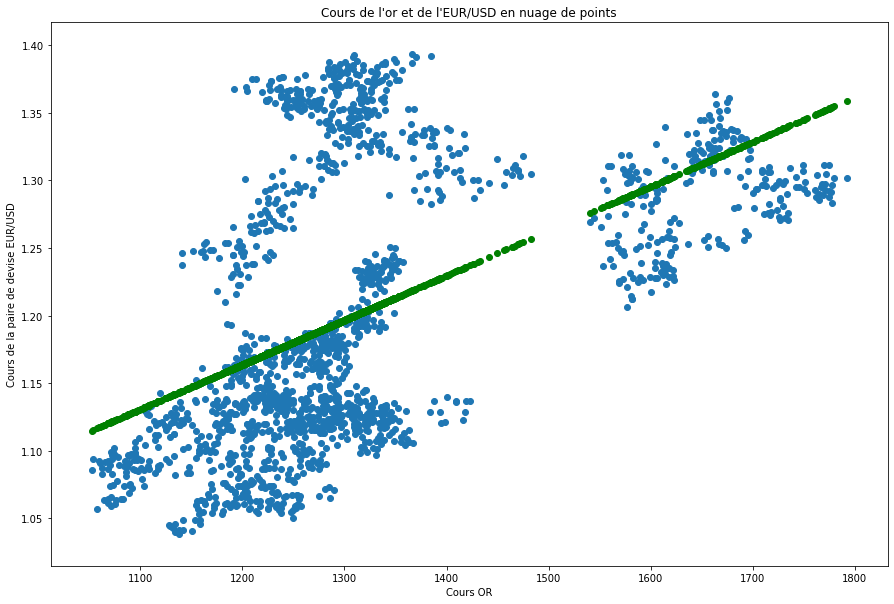

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(X,y)
plt.scatter(X, y_pred, color="green")
plt.title("Cours de l'or et de l'EUR/USD en nuage de points")
plt.ylabel("Cours de la paire de devise EUR/USD")
plt.xlabel("Cours OR")
plt.show()

## 4.2 Régression numérique en finance

In [8]:
##### Scindage de la base de données en X et y
X = datasets[["AMZN", "BRENT", "CAC40","NQ100",
              "DJI30", "DAX30", "GOLD", "EURUSD"]]
y = datasets[["NQ100"]]

##### Scindage en en jeu de train et jeu de visualisation
##### On met un intervalle d'écart de une période
X_train = X.iloc[0:1400-1,:].values
X_visu = X.iloc[1400:1800-1,:].values

y_train = y.iloc[1:1400,:].values
y_visu = y.iloc[1400+1:1800,:].values

In [9]:
##### Importation de la fonction de standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

##### Entrainement de la standardisation et application
Xtrain_sc = sc.fit_transform(X_train)

##### Application de la standardisation
Xvisu_sc = sc.transform(X_visu)

##### Entrainement de la standardisation et application
ytrain_sc = sc.fit_transform(y_train)

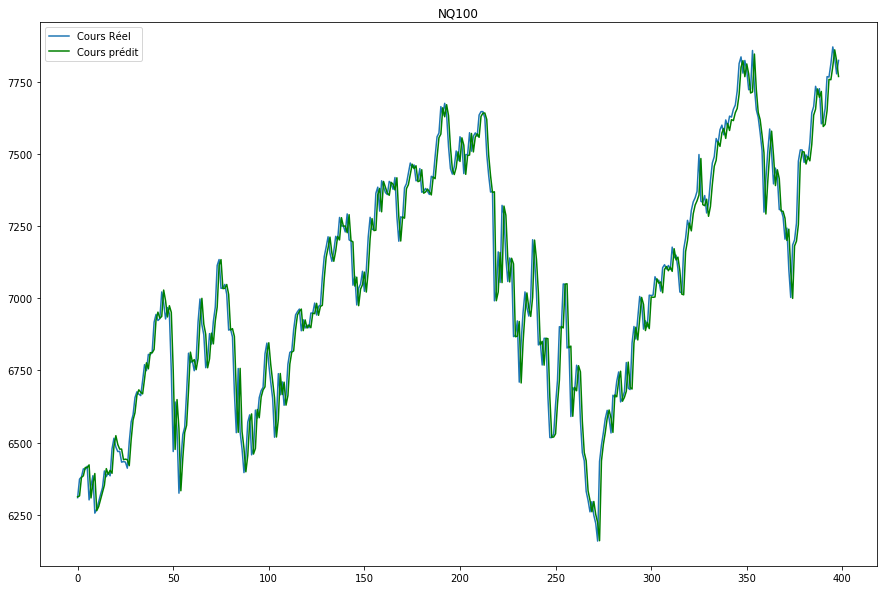

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(Xtrain_sc, ytrain_sc)
y_pred = sc.inverse_transform(lr.predict(Xvisu_sc))

##### Affichage
plt.figure(figsize=(15,10))
plt.plot(y_visu, label="Cours Réel")
plt.plot(y_pred, color="green", label="Cours prédit")
plt.legend()
plt.title("NQ100")
plt.show()

## 4.3 Mesure de la perforamnce d'une regression

In [11]:
bd = np.concatenate((y_visu, np.round(y_pred.reshape(len(y_pred),1),2)), axis=1)
pds.DataFrame(bd, columns=["Cours Réel", "Cours prédit"]).pct_change(1).dropna().corr()

,Cours Réel,Cours prédit
Cours Réel,1.000000,0.000927
Cours prédit,0.000927,1.000000


In [12]:
from sklearn.metrics import r2_score
r2_score(y_visu, y_pred)

0.9592226915731071